# 조건부 체인 (Conditional Chains)
- 입력에 따라 다른 체인을 실행할 수 있습니다.

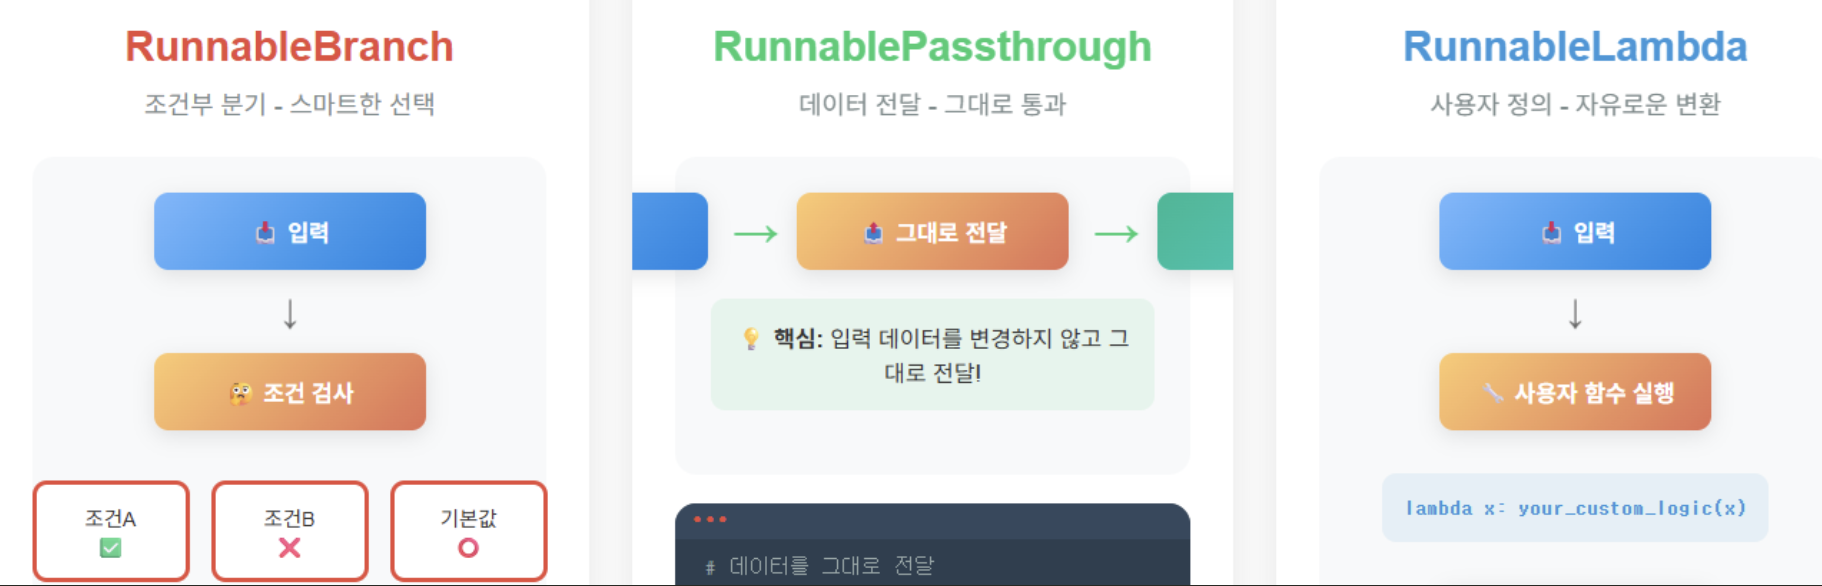

# Model

## [OpenAI API Key 발급](https://platform.openai.com/api-keys)

In [1]:
from dotenv import load_dotenv

# 환경변수 로드
load_dotenv()

True

In [2]:
import os 

# API 키 확인
api_key = os.getenv("OPENAI_API_KEY")
if api_key:
    print("OpenAI API 키가 설정되었습니다. (GPT 모델 사용)")
else:
    print("OpenAI API 키가 없습니다.")

OpenAI API 키가 설정되었습니다. (GPT 모델 사용)


## ChatOpenAI

In [3]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    model="gpt-5-nano",
    reasoning_effort="high",        # 논리성 강화
)

# Parser

In [4]:
from langchain_core.output_parsers import StrOutputParser

# OutputParser 설정
output_parser = StrOutputParser()

# RunnableBranch

In [5]:
from langchain.prompts import PromptTemplate

tech_prompt = PromptTemplate(
    input_variables=["question"],
    template="기술 전문가로서 다음 질문에 답변해주세요: {question}"
)

cooking_prompt = PromptTemplate(
    input_variables=["question"],
    template="요리 전문가로서 다음 질문에 답변해주세요: {question}"
)

general_prompt = PromptTemplate(
    input_variables=["question"],
    template="다음 질문에 답변해주세요: {question}"
)

In [6]:
from langchain_core.runnables import RunnableBranch

# 조건부 체인 생성
conditional_chain = RunnableBranch(
    # 조건: "프로그래밍", "코딩", "개발" 키워드가 포함된 경우
    (lambda x: any(keyword in x["question"].lower() for keyword in ["프로그래밍", "코딩", "개발", "파이썬", "자바"]), 
    tech_prompt | llm | output_parser),
    
    # 조건: "요리", "음식", "레시피" 키워드가 포함된 경우
    (lambda x: any(keyword in x["question"].lower() for keyword in ["요리", "음식", "레시피"]), 
    cooking_prompt | llm | output_parser),
    
    # 기본값
    general_prompt | llm | output_parser
)

In [7]:
question = "파이썬으로 웹 크롤링하는 방법을 알려주세요."
print(f"질문: {question}")

result = conditional_chain.invoke({"question": question})
print(f"답변: {result}\n")

질문: 파이썬으로 웹 크롤링하는 방법을 알려주세요.
답변: 다음은 파이썬으로 웹 크롤링하는 방법에 대한 실전 가이드입니다. 합법성과 윤리를 먼저 지키는 것이 중요하므로, 크롤링하기 전에 반드시 대상 사이트의 robots.txt와 이용 약관을 확인하고, 접근 속도와 데이터 사용에 주의하세요.

1) 기본 아이디어와 도구
- 목표 정의: 어떤 데이터를 수집할지(제목, 본문, 메타데이터 등), 어느 페이지를 대상으로 할지 결정
- 정적 페이지 크롤링(주로 HTML 파싱): requests로 페이지를 받고 BeautifulSoup로 파싱
- 대규모/다중 페이지 크롤링: Scrapy 같은 프레임워크를 사용하면 관리가 쉽고 속도도 최적화하기 좋음
- 동적 페이지 처리: 자바스크립트로 렌더링되는 페이지는 Selenium, Playwright, 또는 requests-html 같은 도구가 필요
- 데이터 저장: CSV/JSON/데이터베이스 등 원하는 포맷으로 저장

필수 도구 설치 예시
- 정적 페이지 크롤링에 필요한 라이브러리
  - pip install requests beautifulsoup4 lxml
- 동적 페이지를 다루려면
  - pip install selenium webdriver-manager
  - 또는 pip install playwright && python -m playwright install
- 대규모 크롤링이나 프레임워크를 원하면
  - pip install Scrapy

2) 간단한 정적 페이지 크롤러 예제
목적: 한 사이트를 시작 페이지로 삼아 링크를 따라가며 제목을 수집하고, 같은 도메인 내에서만 순회합니다. robots.txt도 확인합니다.

예시 코드(간단한 BFS 형태의 크롤러)
- 주석은 한국어로 달아 두었습니다.

```
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin, urlparse
from urllib.robotparser import 

In [8]:
question = "김치찌개 만드는 방법을 알려주세요."
print(f"질문: {question}")

result = conditional_chain.invoke({"question": question})
print(f"답변: {result}\n")

질문: 김치찌개 만드는 방법을 알려주세요.
답변: 다음은 기본적인 돼지고기 김치찌개(4인분) 만드는 방법입니다.

재료
- 잘 익은 김치 400 g
- 돼지고기 (삼겹살 또는 목살) 200 g, 한입 크기로 자르기
- 두부 1모(단단한 것) → 큐브 모양으로
- 양파 1개, 굵게 채 썰기
- 대파 1대, 어슷하게 썰기
- 마늘 2-3쪽, 다진 것
- 물 또는 멸치육수 900 ml ~ 1 L
- 고춧가루 1-2 큰술
- 고추장 1/2 큰술(선택, 색감과 깊이 추가용)
- 간장 1 큰술(또는 소금으로 간 맞추기)
- 소금, 후추 약간
- 참기름 1 작은술(선택)

조리 순서
1) 냄비에 기름을 약간 두르고 중불에서 돼지고기를 넣어 겉면이 살짝 노릇해질 때까지 볶습니다(약 3-4분).
2) 다진 마늘과 양파를 넣고 향이 올라올 때까지 1-2분 정도 볶은 뒤, 잘 익은 김치를 넣고 2-3분 더 볶아 김치의 풍미를 끌어냅니다.
3) 고춧가루를 넣고 30초 정도 더 볶아 매운맛과 색을 내고, 물이나 멸치육수를 부어 끓입니다.
4) 끓기 시작하면 불을 중약불로 줄이고 15-20분 정도 끓여 돼지고기가 부드러워지도록 합니다.
5) 두부를 큐브 형태로 넣고 대파를 넣은 뒤, 간장으로 간을 맞춥니다. 필요하면 소금으로 추가 간을 하고, 후추로 마무리합니다.
6) 5-7분 더 끓여 모든 재료가 잘 어우러지면 불을 끄고 조금 식혀도 좋습니다. 밥과 함께 바로 드세요.

팁
- 잘 익은 김치를 사용하면 깊은 맛이 납니다. 김치 국물도 함께 넣으면 풍미가 더 좋습니다.
- 매운맛은 고춧가루와 고추장의 양으로 조절하세요. 매콤하게 원하면 고춧가루를 더 추가하고, 순하게 원하면 조금 줄이세요.
- 육수 없이 물로만 끓여도 되지만, 멸치육수나 다시마 육수를 쓰면 더 깊은 맛이 납니다.
- 두부는 마지막에 넣어 부서지지 않게 살짝만 끓이고 꺼도 좋습니다.
- 해물이나 소시지, 돼지고기 대신 해물(새우, 오징어, 조개)을 넣어 해물김치찌개로도 variations 가능합니다.

비건 버전(육류 

In [9]:
question = "오늘 날씨가 어떤가요?"
print(f"질문: {question}")

result = conditional_chain.invoke({"question": question})
print(f"답변: {result}\n")

질문: 오늘 날씨가 어떤가요?
답변: 오늘 날씨를 알려면 어느 지역의 정보를 원하시는지 먼저 알려주세요. 예를 들어 서울, 부산, 대전 같은 도시 이름이나 지역을 말씀해 주시면 해당 지역의 오늘 날씨를 요약해 드리겠습니다. 
- 위치를 지금 바로 공유해 주실 수 있다면 그 위치를 기준으로 정보를 확인해 드릴 수 있어요.
- 원하시면 인터넷에서 '오늘 [도시] 날씨'를 검색하는 방법도 안내해 드리겠습니다.



# RunnablePassthrough

## 1단계: 주제 분석 체인

In [10]:
from langchain.prompts import PromptTemplate

topic_analysis_prompt = PromptTemplate(
    input_variables=["topic"],
    template="'{topic}'라는 주제를 분석하여 핵심 키워드 3개를 콤마로 구분해서 나열해주세요."
)

topic_analysis_chain = topic_analysis_prompt | llm | output_parser

## 2단계: 키워드 기반 상세 설명 체인

In [11]:

detail_prompt = PromptTemplate(
    input_variables=["topic", "keywords"],
    template="""
    주제: {topic}
    키워드: {keywords}
    
    위 키워드들을 바탕으로 주제에 대한 상세한 설명을 작성해주세요.
    """
)

detail_chain = detail_prompt | llm | output_parser

## 3단계: RunnablePassthrough

In [12]:
from langchain_core.runnables import RunnablePassthrough

def create_complex_chain_passthrough():
    # 입력을 그대로 전달하면서 키워드 분석 결과를 추가
    return RunnablePassthrough.assign(
        keywords=topic_analysis_chain
    ) | detail_chain

complex_chain = create_complex_chain_passthrough()


In [13]:
print("\n=== RunnablePassthrough 방식 ===")

result = complex_chain.invoke({"topic": "지속가능한 에너지"})
print(result)


=== RunnablePassthrough 방식 ===
다음은 지속가능한 에너지에 대한 상세한 설명으로, 재생에너지, 에너지효율, 탈탄소화의 서로 얽힌 관계를 중점적으로 다룹니다.

개요
- 지속가능한 에너지는 현재와 미래 세대의 에너지 수요를 충족시키되 기후 변화 억제, 에너지 안보 강화, 경제적 합리성까지 달성하는 에너지 시스템을 말합니다. 핵심은 재생가능한 자원을 활용한 전력 생산의 확대, 에너지 소비의 효율화, 그리고 탄소배출을 단계적으로 줄이려는 탈탄소화 전략의 결합입니다.
- 이 세 가지 축은 서로 보완적이며, 하나만으로는 충분하지 않습니다. 예를 들어 재생에너지를 늘려도 수요가 계속 증가하거나 저장·전력망의 문제가 남아 있다면 안정적 공급이 어렵고, 에너지효율만 높여도 남는 에너지가 결국 더 저렴한 재생에너지로 전환되지 않으면 탈탄소화의 효과가 제한될 수 있습니다. 따라서 시스템 전체의 균형이 필요합니다.

1. 재생에너지의 이해와 역할
- 정의와 구성
  - 재생에너지는 태양광, 풍력, 수력, 지열, 바이오에너지, 해양에너지 등 자연적으로 지속적으로 재생되는 자원을 이용해 전기를 생산하는 에너지원입니다.
- 장점
  - 기후 변화의 주범인 화석연료 의존도를 낮추고, 연료비 변동성에 덜 취약하며, 원료 확보의 지역별 자립성을 높일 수 있습니다.
  - 운영비가 낮아지면 장기적으로 에너지 비용 안정성에 기여합니다.
- 주요 도전과 해결책
  - 간헐성: 태양광은 낮과 밤, 풍력은 바람의 변화에 따라 출력이 달라집니다. 해결책은 저장 기술(배터리, 펌프저류), 다양한 자원원 간의 상호 보완(자원 다각화), 그리고 수요-공급 관리(DR)입니다.
  - 지역 적합성 및 토지 활용: 대규모 발전단지가 생태·토지에 미치는 영향 관리와 지역사회 수용성 확보가 중요합니다.
  - 저장과 송전 인프라: 대용량 저장소와 그리드 확충, 교류형 송전망 확대로 변동성을 흘려보낼 수 있습니다.
- 시스템적 역할
  - 전력 수요의 급증 시에도 공급을 확대할 수 있고, 전

# RunnableLambda

## 쉬운 예제 

In [14]:
from langchain_core.runnables import RunnableLambda

# 한국어 질문 앞에 정중한 요청을 붙이는 전처리 함수
def add_polite_prefix(text: str) -> str:
    return f"아래 질문에 정중하게 대답해 주세요: {text}"


In [15]:
# RunnableLambda로 래핑
preprocess_chain = RunnableLambda(add_polite_prefix)


In [16]:
# 실행
question = "오늘 날씨는 어떤가요?"
result = preprocess_chain.invoke(question)

print(result)

아래 질문에 정중하게 대답해 주세요: 오늘 날씨는 어떤가요?


## 어려운 예제 

### 1. RunnableLambda를 사용하여 전처리 함수 만들기

In [17]:
from langchain_core.runnables import RunnableLambda
from langchain_core.prompts import ChatPromptTemplate
from langchain.schema import StrOutputParser

# 1. RunnableLambda를 사용하여 전처리 함수 만들기
# 사용자 질문 앞에 "다음 질문에 답해줘: " 라는 문구를 추가하는 함수
def add_prefix(input_text):
    return {"question": f"다음 질문에 답해줘: {input_text}"}

### 2. RunnableLambda를 사용하여 후처리 함수 만들기

In [22]:
import re

# 2. RunnableLambda를 사용하여 후처리 함수 만들기
def remove_unnecessary_phrase(output_text):
    return "질문하신 답변에 대해서 얘기하겠습니다.\n"+output_text.strip() # 텍스트 추가 

### 3. LangChain 런어블 객체들 정의

In [23]:
# 3. LangChain 런어블 객체들 정의
prompt = ChatPromptTemplate.from_template("{question}")
output_parser = StrOutputParser()

### 4. RunnableLambda를 포함하여 체인 구성

In [24]:
# 4. RunnableLambda를 포함하여 체인 구성
# '|' 연산자를 사용하여 순서대로 실행되는 체인 구축
chain = (
    RunnableLambda(add_prefix)  # 1. 전처리 함수 실행 (입력 데이터를 딕셔너리로 변환)
    | prompt  # 2. 전처리된 딕셔너리를 프롬프트 템플릿에 적용
    | llm  # 3. 완성된 프롬프트를 LLM에 전달하고 응답 받기
    | output_parser  # 4. LLM 응답을 문자열로 변환
    | RunnableLambda(remove_unnecessary_phrase) # 5. 후처리 함수 실행
)

### 5. 체인 실행

In [25]:
# 5. 체인 실행
question = "세계에서 가장 높은 산은?"
result = chain.invoke(question)

print(result) # 결과: "세계에서 가장 높은 산은 에베레스트 산입니다." (후처리가 적용된 응답)

질문하신 답변에 대해서 얘기하겠습니다.
에베레스트 산(Mount Everest)입니다. 해발 고도 약 8,848m(최근 재측정으로 8,848.86m). 위치는 네팔과 중국의 경계에 있습니다. 참고로 해발 고도 기준으로 가장 높지만, 기저면에서의 높이로 보면 마우나 케아가 더 큽니다.
